<a href="https://colab.research.google.com/github/aidot-kr/AISecurity/blob/master/5_Word2Vec_FastText.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word2Vec

- Gensim 패키지를 사용한 Word2Vec
- 참고URL: https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial

1) 학습에 필요한 코퍼스 수집

In [6]:
!pip3 install wikipedia-api

  Created wheel for wikipedia-api: filename=Wikipedia_API-0.5.4-cp36-none-any.whl size=13462 sha256=276fa8f205383148f86fa0fb91f778d15f22f0922202cd4d5a239d6e980d73d6
  Stored in directory: /root/.cache/pip/wheels/bf/40/42/ba1d497f3712281b659dd65b566fc868035c859239571a725a
Successfully built wikipedia-api


In [8]:
!pip3 install konlpy

     |████████████████████████████████| 19.4MB 23.8MB/s 
     |████████████████████████████████| 3.8MB 45.5MB/s 
     |████████████████████████████████| 92kB 8.1MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [3]:
# 설치된 라이브리 호출
import wikipediaapi
import urllib.request
from konlpy.tag import Okt
from gensim.models.word2vec import Word2Vec
import pandas as pd
import matplotlib.pyplot as plt


# 페이지 요약 정보를 수집
wiki_txt=wikipediaapi.Wikipedia('ko')
search_nm = '해킹'

# 해당 페이지가 존재하는지 확인
page_py = wiki_txt.page(search_nm) 
print("Page - Exists: %s" % page_py.exists())

# 페이지의 내용 전체를 수집
wiki = wikipediaapi.Wikipedia( language='ko', extract_format=wikipediaapi.ExtractFormat.WIKI) 
p_wiki = wiki.page(search_nm) 
print(p_wiki.text)

Page - Exists: True
해킹(Hacking)은 타인의 컴퓨터 시스템에 무단 침입하여 데이터에 접속할 수 있는 권한을 얻는 것이다. 전자 회로나, 컴퓨터의 하드웨어, 소프트웨어, 네트워크, 웹사이트 등 각종 정보 체계가 본래의 설계자나 관리자, 운영자가 의도하지 않은 동작을 일으키도록 하거나 체계 내에서 주어진 권한 이상으로 정보를 열람, 복제, 변경 가능하게 하는 행위를 광범위하게 이르는 말로도 쓰인다.
또한 해킹은 크래킹과 개념이 다르다. 해킹이 다른 사람의 컴퓨터 시스템이나 통신망에 정당한 접근 권한 없이 접근하거나 허용된 접근 권한의 범위를 초과하여 침입하는 행위 자체를 의미한다면, 크래킹은 그러한 불법적 접근을 통해 다른 사람의 컴퓨터 시스템이나 통신망을 파괴하는 행위를 일컫는다.

낱말의 유래
본래 거칠게 자르거나 헤집는다는 뜻의 해크(영어: hack)이라는 낱말에 지금의 의미를 부여한 것의 유래는 분명하지 않으나 미국 매사추세츠 공과대학교(MIT)에서 한 동아리 회원들이 자신들을 해커(hacker)라고 부른 데에서 유래했다는 설이 있다.

정의와 의미
해킹의 정의는 시간에 따라 변화되어 왔는데 초기에는 '개인의 호기심이나 지적욕구의 바탕 위에 컴퓨터와 컴퓨터간의 네트워크를 탐험하는 행위'를 말했다. 이후 악의적인 행동이 늘어나면서 '다른 컴퓨터 시스템을 침입할 때 파괴적인 계획을 갖고 침입하는 행위'라는 부정적 의미를 갖게 되었으며, 일명 크래킹이라 하였다.
현재 사용하고 있는 해킹이란 의미는 대체적으로 '어떠한 의도에 상관없이 다른 컴퓨터에 침입하는 모든 행위'로서 전산망을 통하여 타인의 컴퓨터 시스템에 엑세스 권한 없이 무단 침입하여 부당 행위를 하는 것을 말하며, 여기서 부당 행위란 불법적인 시스템 사용, 불법적인 자료 열람, 유출 및 변조 등을 뜻한다. 반면 긍정적 의미로는 '각종 정보 체계의 보안 취약점을 미리 알아내고 보완하는 데에 필요한 행위'란 뜻을 가지고 있다.

법률적 해석
대한민국의 정보통신망 이용촉진 및 정보보호 등

2) 데이터 전처리
- 문장 추출, 불용어 제거

In [4]:
import nltk #자연어 처리 패키지
from nltk.corpus import stopwords #NLTK에서 제공되는 불용어 사전
import string # Python  문자열 처리 클래스
import pandas as pd # 데이터분석 라이브러리
import re
from nltk.tokenize import word_tokenize, sent_tokenize

#stopwords_kor = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

def process_text(text):
    #1 문자 구분자 제거
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    #2 영어 불용어 제거
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    #3 한글 불용어 제거
    #clean_words = [word for word in clean_words if not word in stopwords_kor] # 불용어 제거
    
    #3 리스트 반환
    return clean_words

In [5]:
# 전체 문장 전처리 및 문단 기준 분리
from textblob import TextBlob

import nltk
nltk.download('punkt')
nltk.download('stopwords')

from konlpy.tag import Okt
okt = Okt()

tokenized_data = []
text = p_wiki.text
blob = TextBlob(text) # TextBolob 객체 생성

#토큰화(문장기준) 처리
for sentence in blob.sentences: 
    temp = " ".join(process_text(sentence))
    
    temp = okt.nouns(temp)
    temp = [word for word in temp if len(word) > 1]
    print(temp)

    tokenized_data.append(temp)
    

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['해킹', '타인', '컴퓨터', '시스템', '무단', '침입', '데이터', '접속', '권한']
['전자', '회로', '컴퓨터', '하드웨어', '소프트웨어', '네트워크', '웹사이트', '각종', '정보', '체계', '본래', '설계자', '관리자', '운영자', '의도', '동작', '거나', '체계', '권한', '이상', '정보', '열람', '복제', '변경', '행위', '말로']
['또한', '해킹', '크래킹', '개념']
['해킹', '다른', '사람', '컴퓨터', '시스템', '통신망', '접근', '권한', '접근', '거나', '허용', '접근', '권한', '범위', '초과', '침입', '행위', '자체', '의미', '크래킹', '불법', '접근', '통해', '다른', '사람', '컴퓨터', '시스템', '통신망', '파괴', '행위']
['낱말', '유래', '본래', '해크', '영어', '낱말', '지금', '의미', '부여', '유래', '미국', '매사추세츠', '공과', '대학교', '동아리', '회원', '자신', '해커', '유래']
['정의', '의미', '해킹', '정의', '시간', '변화', '초기', '개인', '호기심', '지적', '욕구', '바탕', '컴퓨터', '컴퓨터', '네트워크', '탐험', '행위']
['이후', '악의', '행동', '다른', '컴퓨터', '시스템', '침입', '파괴', '계획', '침입', '행위', '부정', '의미', '일명', '크래킹']
['현재',

3) Word2Vec 모델생성 및 주요파라미터
- min_count : 최소단어의 빈도
- window: 현재 단어와 예측 단어 사이의 최대 거리
- size: 피처 벡터의 차원
- negative: 0 이상인 경우 네거티브 샘플링이 사용됨
- workers: 작업자의 스레드 갯수

In [6]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 200, window = 5, negative = 2, min_count = 1, workers = 4, sg = 1)

# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(146, 200)

4) 모델 사용

In [7]:
print(model.wv.most_similar("해킹"))

[('취약점', 0.19834831357002258), ('각종', 0.16238108277320862), ('악의', 0.1573546826839447), ('데이터', 0.15129633247852325), ('사회', 0.1470029205083847), ('본래', 0.1455584317445755), ('정보', 0.1449938267469406), ('침입', 0.14092829823493958), ('변화', 0.1308325231075287), ('접근', 0.12343665212392807)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


## FastText

In [8]:
from gensim.models import FastText
ft_model = FastText(tokenized_data, size=200, window=5, negative = 2,min_count=1, workers=4, sg=1)

In [9]:
print(ft_model.wv.most_similar("해킹"))

[('웹해킹', 0.19434380531311035), ('의도', 0.1712305247783661), ('동작', 0.1611667275428772), ('레드', 0.16050764918327332), ('부당', 0.1373952031135559), ('여기', 0.12856771051883698), ('불문', 0.12519527971744537), ('통신망', 0.10751117020845413), ('촉진', 0.10605822503566742), ('사이버', 0.10447848588228226)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


### word2vec 시각화

In [10]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [11]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

#model_name = '300features_40minwords_10text'
#model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100,:])
# X_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


146
[ 0.0012908  -0.00088639  0.00219642  0.00188222 -0.00055166 -0.00245566
  0.00209263  0.00140598 -0.00141511  0.00170538]


In [12]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape

df.head(10)

,x,y
해킹,-14.679600,34.761600
타인,33.733810,-13.293459
컴퓨터,-30.889940,-26.771971
시스템,25.979065,7.437777
무단,-14.464503,15.015123
침입,-32.763073,31.754017
데이터,40.674404,26.386148
접속,25.356499,-10.363153
권한,18.955599,-5.731719
전자,0.032896,35.853672


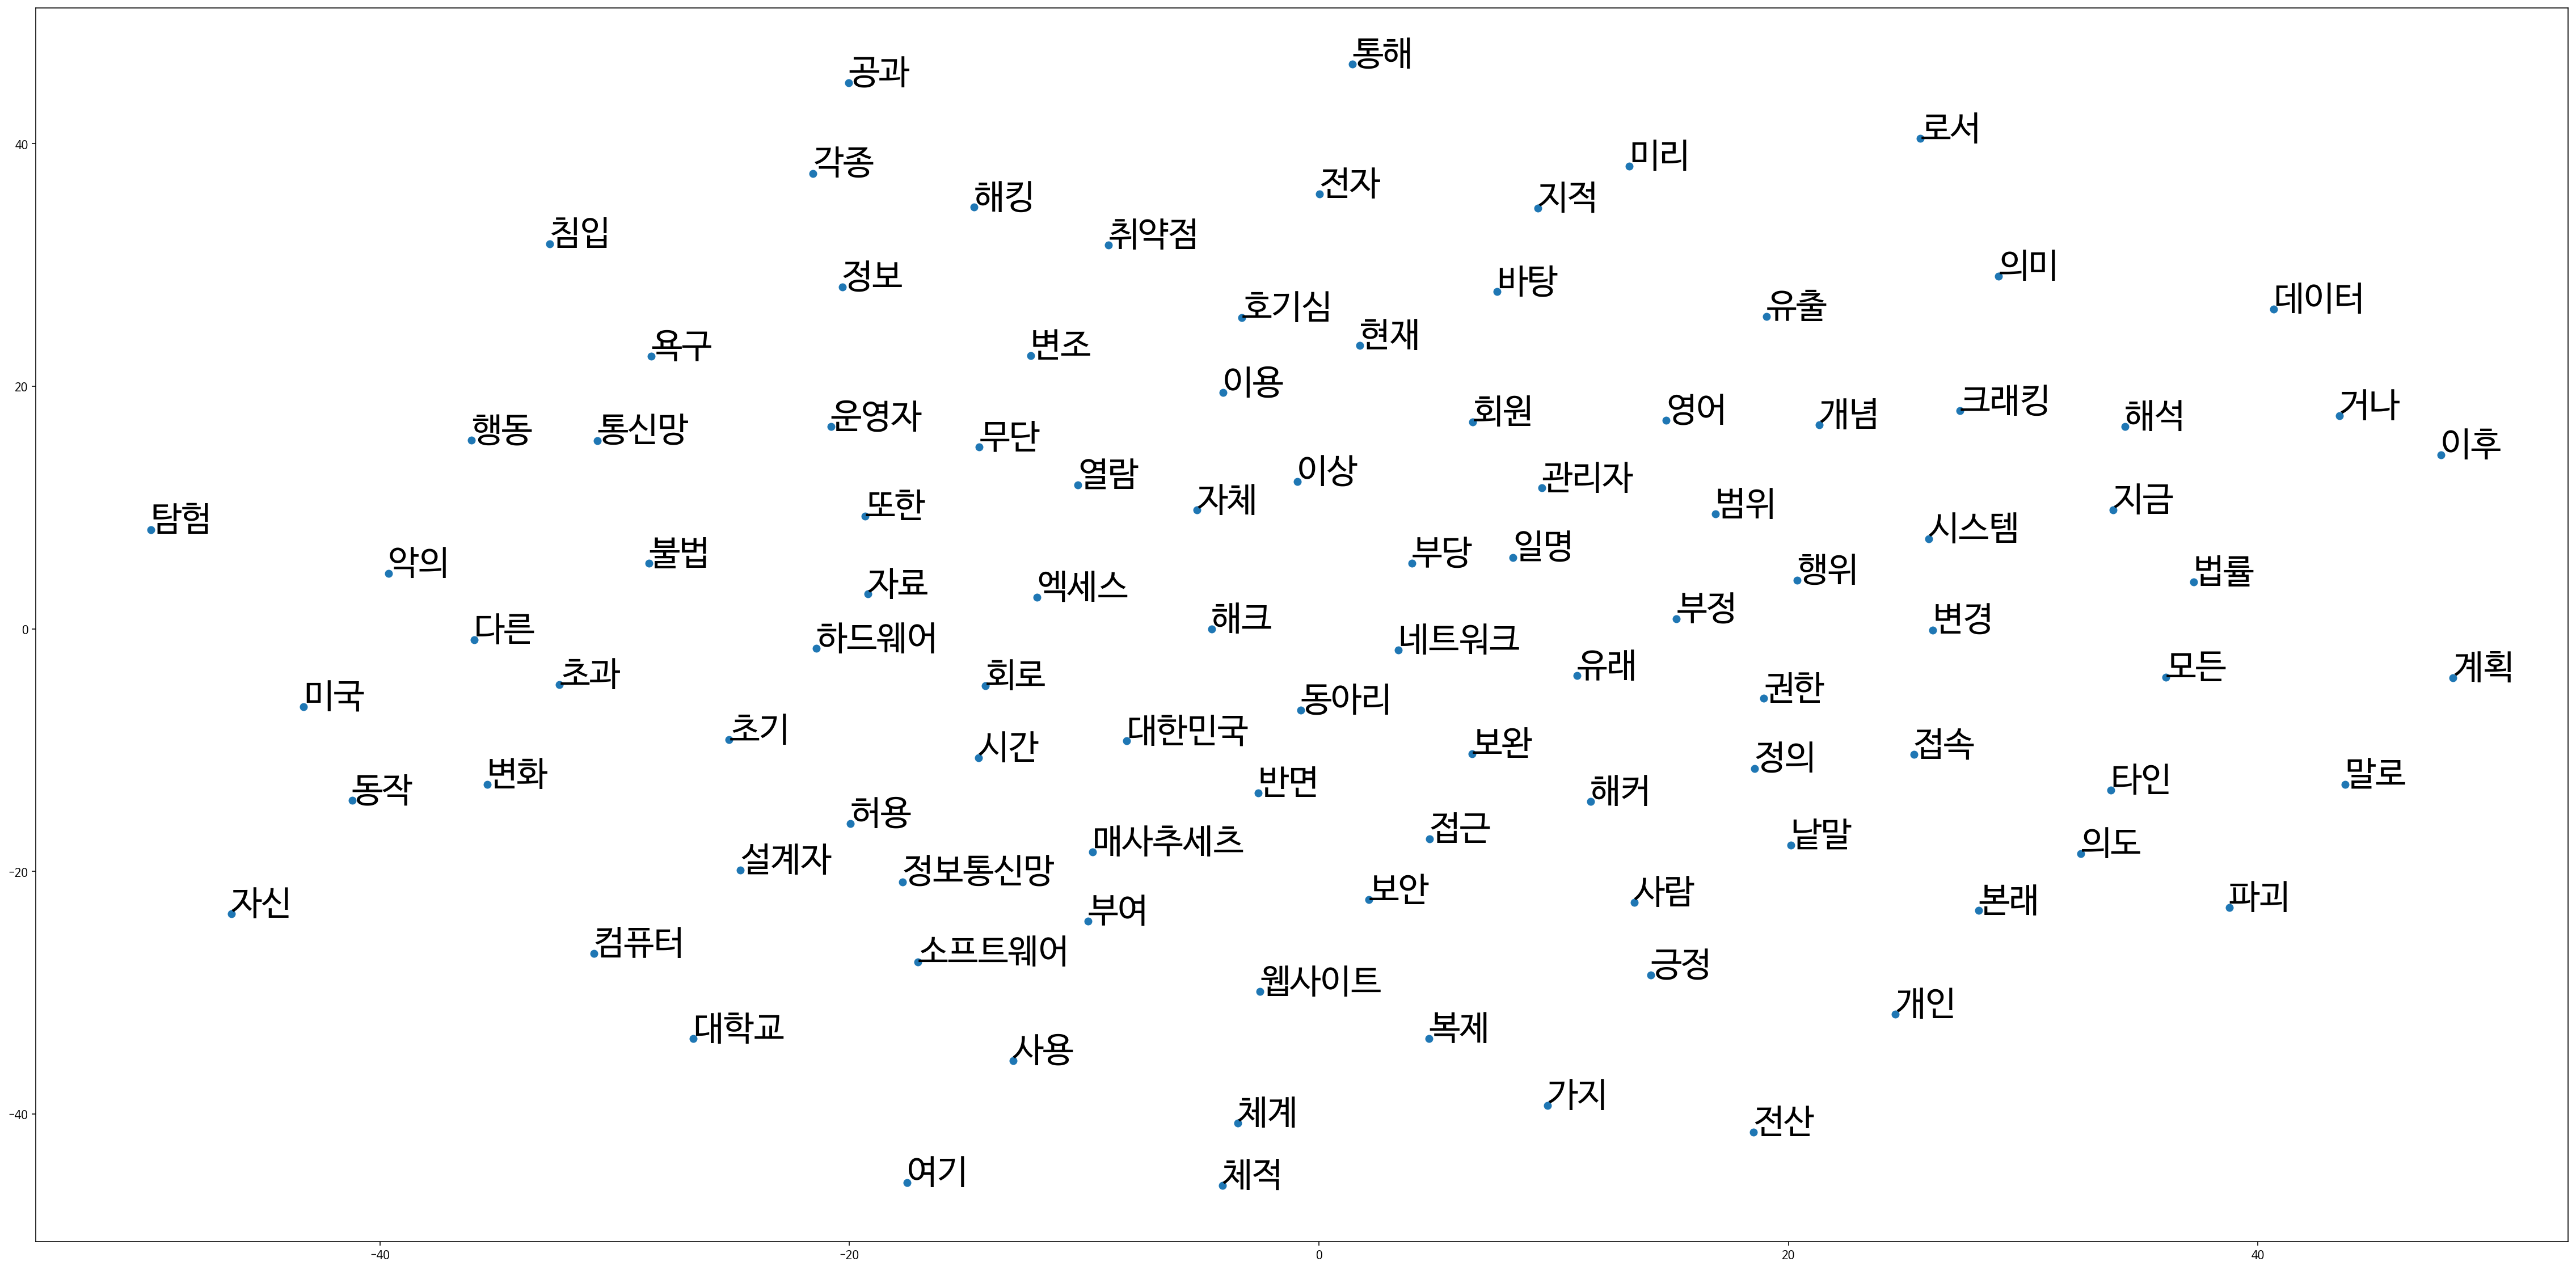

In [13]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()